In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset_path = "student_data.csv"
student_data = pd.read_csv(r"C:\Users\shara\OneDrive\Desktop\Spring 2025\IS 733\CW 3\student_data.csv")

# Display first few rows
print(student_data.head())

# Check for missing values
print(student_data.isnull().sum())

# Summary statistics
print(student_data.describe())


   Hours_Studied  Review_Session  Results
0       3.745401               0        0
1       9.507143               1        1
2       7.319939               0        1
3       5.986585               0        1
4       1.560186               1        1
Hours_Studied     0
Review_Session    0
Results           0
dtype: int64
       Hours_Studied  Review_Session     Results
count     100.000000      100.000000  100.000000
mean        4.701807        0.490000    0.680000
std         2.974894        0.502418    0.468826
min         0.055221        0.000000    0.000000
25%         1.932008        0.000000    0.000000
50%         4.641425        0.000000    1.000000
75%         7.302031        1.000000    1.000000
max         9.868869        1.000000    1.000000


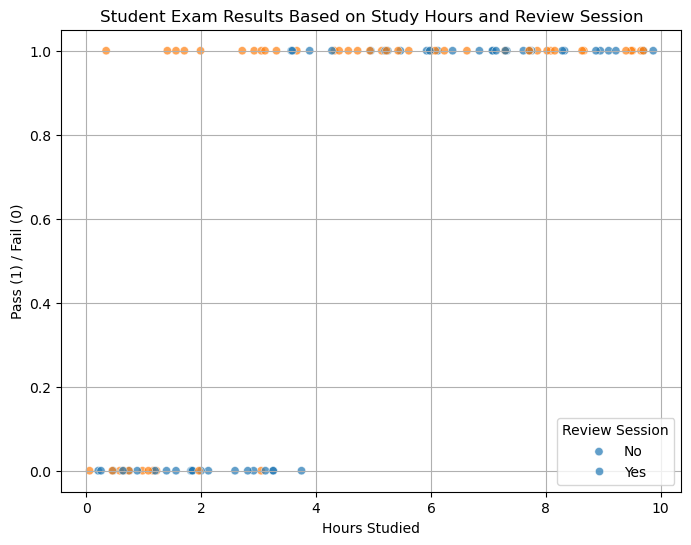

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=student_data["Hours_Studied"], 
                y=student_data["Results"], 
                hue=student_data["Review_Session"], 
                alpha=0.7)
plt.xlabel("Hours Studied")
plt.ylabel("Pass (1) / Fail (0)")
plt.title("Student Exam Results Based on Study Hours and Review Session")
plt.legend(title="Review Session", labels=["No", "Yes"])
plt.grid(True)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Defining features and target variable
X = student_data[["Hours_Studied", "Review_Session"]]
y = student_data["Results"]

# Training logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Getting model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-4.61373892]
Coefficients: [[1.36542016 1.87797591]]


Accuracy: 0.93
AUC Score: 0.9761029411764706


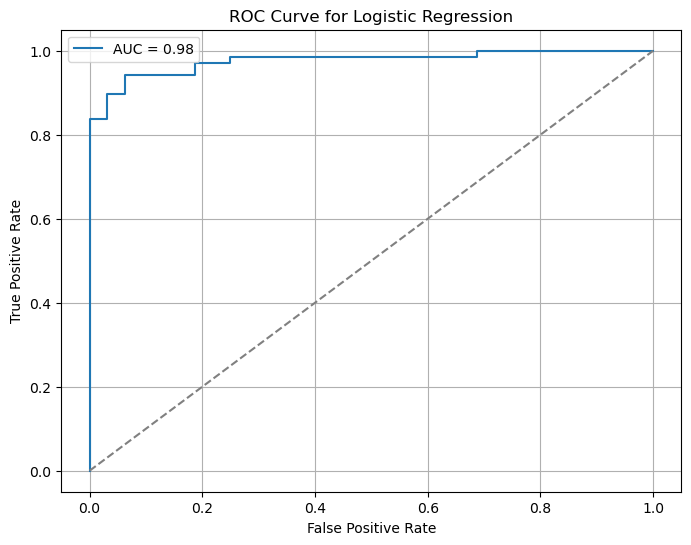

In [9]:
# Predictions
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]  # Get probabilities for ROC

# Accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# AUC Score
auc = roc_auc_score(y, y_prob)
print("AUC Score:", auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()